In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.mixed_linear_model import MixedLM
import re
from statsmodels.formula.api import ols
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import Independence, Exchangeable, Autoregressive, Unstructured

In [2]:
data = {
    'Subject': list(range(1, 25)),
    'Group': ['A'] * 8 + ['B'] * 8 + ['C'] * 8,
    'Week 1': [45, 20, 50, 25, 100, 20, 30, 30, 40, 65, 30, 25, 45, 15, 35, 40, 20, 35, 35, 45, 45, 25, 25, 15],
    'Week 2': [45, 25, 50, 25, 100, 20, 35, 35, 55, 65, 30, 35, 45, 15, 35, 40, 20, 35, 35, 65, 65, 30, 25, 35],
    'Week 3': [45, 25, 55, 35, 100, 30, 35, 45, 60, 70, 40, 35, 80, 10, 35, 40, 30, 35, 35, 65, 70, 30, 30, 35],
    'Week 4': [45, 25, 70, 40, 100, 50, 40, 50, 70, 70, 45, 35, 80, 10, 45, 55, 30, 40, 40, 65, 90, 35, 30, 35],
    'Week 5': [80, 30, 70, 60, 100, 50, 50, 55, 80, 80, 65, 40, 80, 10, 45, 55, 30, 40, 40, 80, 90, 40, 30, 40],
    'Week 6': [80, 35, 75, 60, 100, 60, 60, 65, 85, 80, 85, 45, 80, 20, 45, 55, 30, 40, 40, 85, 95, 40, 30, 50],
    'Week 7': [80, 30, 90, 70, 100, 85, 75, 65, 90, 80, 85, 45, 80, 20, 50, 60, 30, 40, 45, 95, 95, 40, 35, 65],
    'Week 8': [90, 50, 90, 80, 100, 95, 85, 70, 90, 80, 85, 45, 80, 20, 50, 65, 30, 40, 45, 100, 100, 40, 40, 65]
}

df = pd.DataFrame(data)
df

,Subject,Group,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
0,1,A,45,45,45,45,80,80,80,90
1,2,A,20,25,25,25,30,35,30,50
2,3,A,50,50,55,70,70,75,90,90
3,4,A,25,25,35,40,60,60,70,80
4,5,A,100,100,100,100,100,100,100,100
5,6,A,20,20,30,50,50,60,85,95
6,7,A,30,35,35,40,50,60,75,85
7,8,A,30,35,45,50,55,65,65,70
8,9,B,40,55,60,70,80,85,90,90
9,10,B,65,65,70,70,80,80,80,80


Obten los coeficientes de correlación de los scores de recuperación del derrame cerebral

In [8]:
correlation_matrix = df[['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8']].corr()
print(correlation_matrix)

          Week 1    Week 2    Week 3    Week 4    Week 5    Week 6    Week 7  \
Week 1  1.000000  0.928036  0.882015  0.830654  0.793665  0.712563  0.616351   
Week 2  0.928036  1.000000  0.922556  0.877406  0.846683  0.789590  0.704149   
Week 3  0.882015  0.922556  1.000000  0.953091  0.909215  0.854262  0.766729   
Week 4  0.830654  0.877406  0.953091  1.000000  0.921516  0.878634  0.831335   
Week 5  0.793665  0.846683  0.909215  0.921516  1.000000  0.973430  0.914951   
Week 6  0.712563  0.789590  0.854262  0.878634  0.973430  1.000000  0.956934   
Week 7  0.616351  0.704149  0.766729  0.831335  0.914951  0.956934  1.000000   
Week 8  0.554425  0.642599  0.700791  0.771600  0.881955  0.926693  0.977613   

          Week 8  
Week 1  0.554425  
Week 2  0.642599  
Week 3  0.700791  
Week 4  0.771600  
Week 5  0.881955  
Week 6  0.926693  
Week 7  0.977613  
Week 8  1.000000  


Grafica la evolución que tuvo cada individuo en las 8 semanas

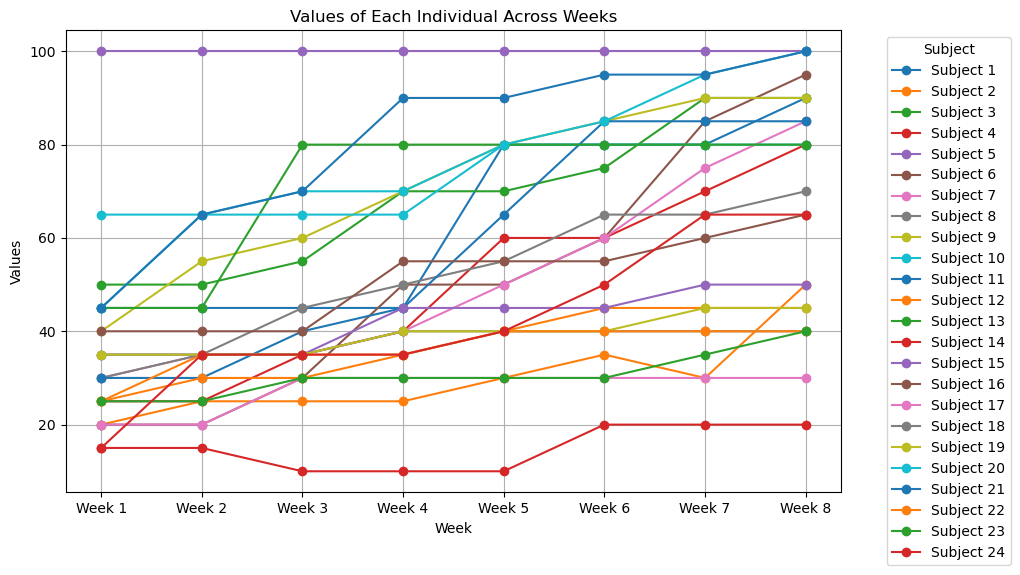

In [11]:
plt.figure(figsize=(10, 6))  
for index, row in df.iterrows():
    plt.plot(['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8'], 
             [row['Week 1'], row['Week 2'], row['Week 3'], row['Week 4'], row['Week 5'], row['Week 6'], row['Week 7'], row['Week 8']], 
             marker='o', label=f'Subject {row["Subject"]}')
plt.title('Values of Each Individual Across Weeks')
plt.xlabel('Week')
plt.ylabel('Values')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(True) 
plt.show()

Grafica el promedio de la evolución que tuvo cada grupo durante las 8 semanas.

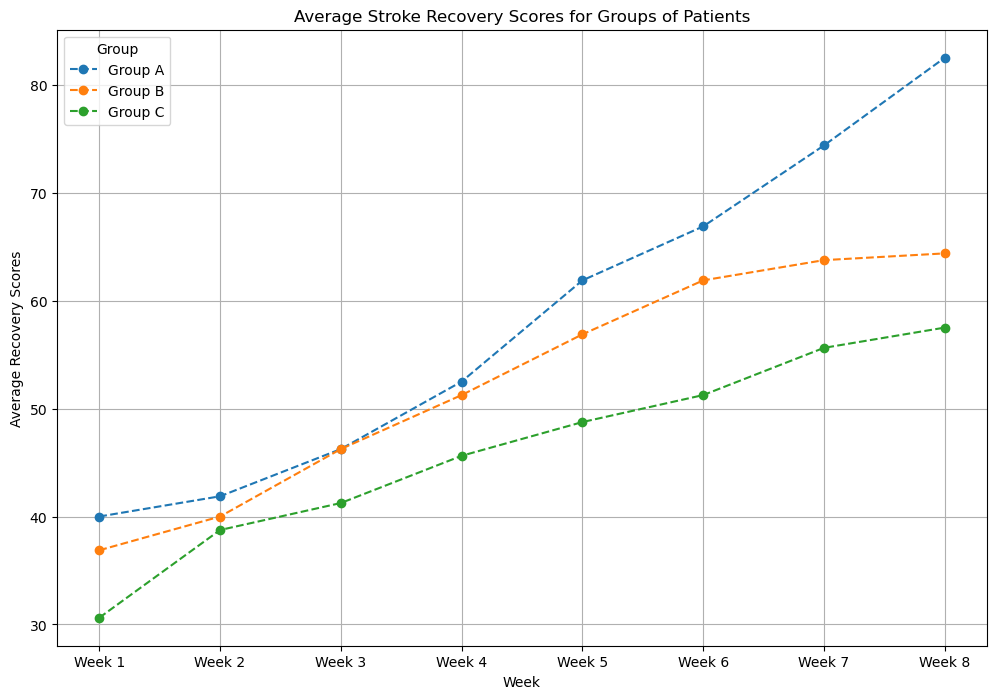

In [12]:
weeks = ['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8']
group_averages = df.groupby('Group')[weeks].mean()
plt.figure(figsize=(12, 8))
for group in group_averages.index:
    plt.plot(weeks, group_averages.loc[group], marker='o', linestyle='--', label=f'Group {group}')
plt.title('Average Stroke Recovery Scores for Groups of Patients')
plt.xlabel('Week')
plt.ylabel('Average Recovery Scores')
plt.legend(title='Group')
plt.grid(True)
plt.show()

Realiza los graficos de dispersión de los 3 grupos durante las 8 semanas

c:\Users\luisl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


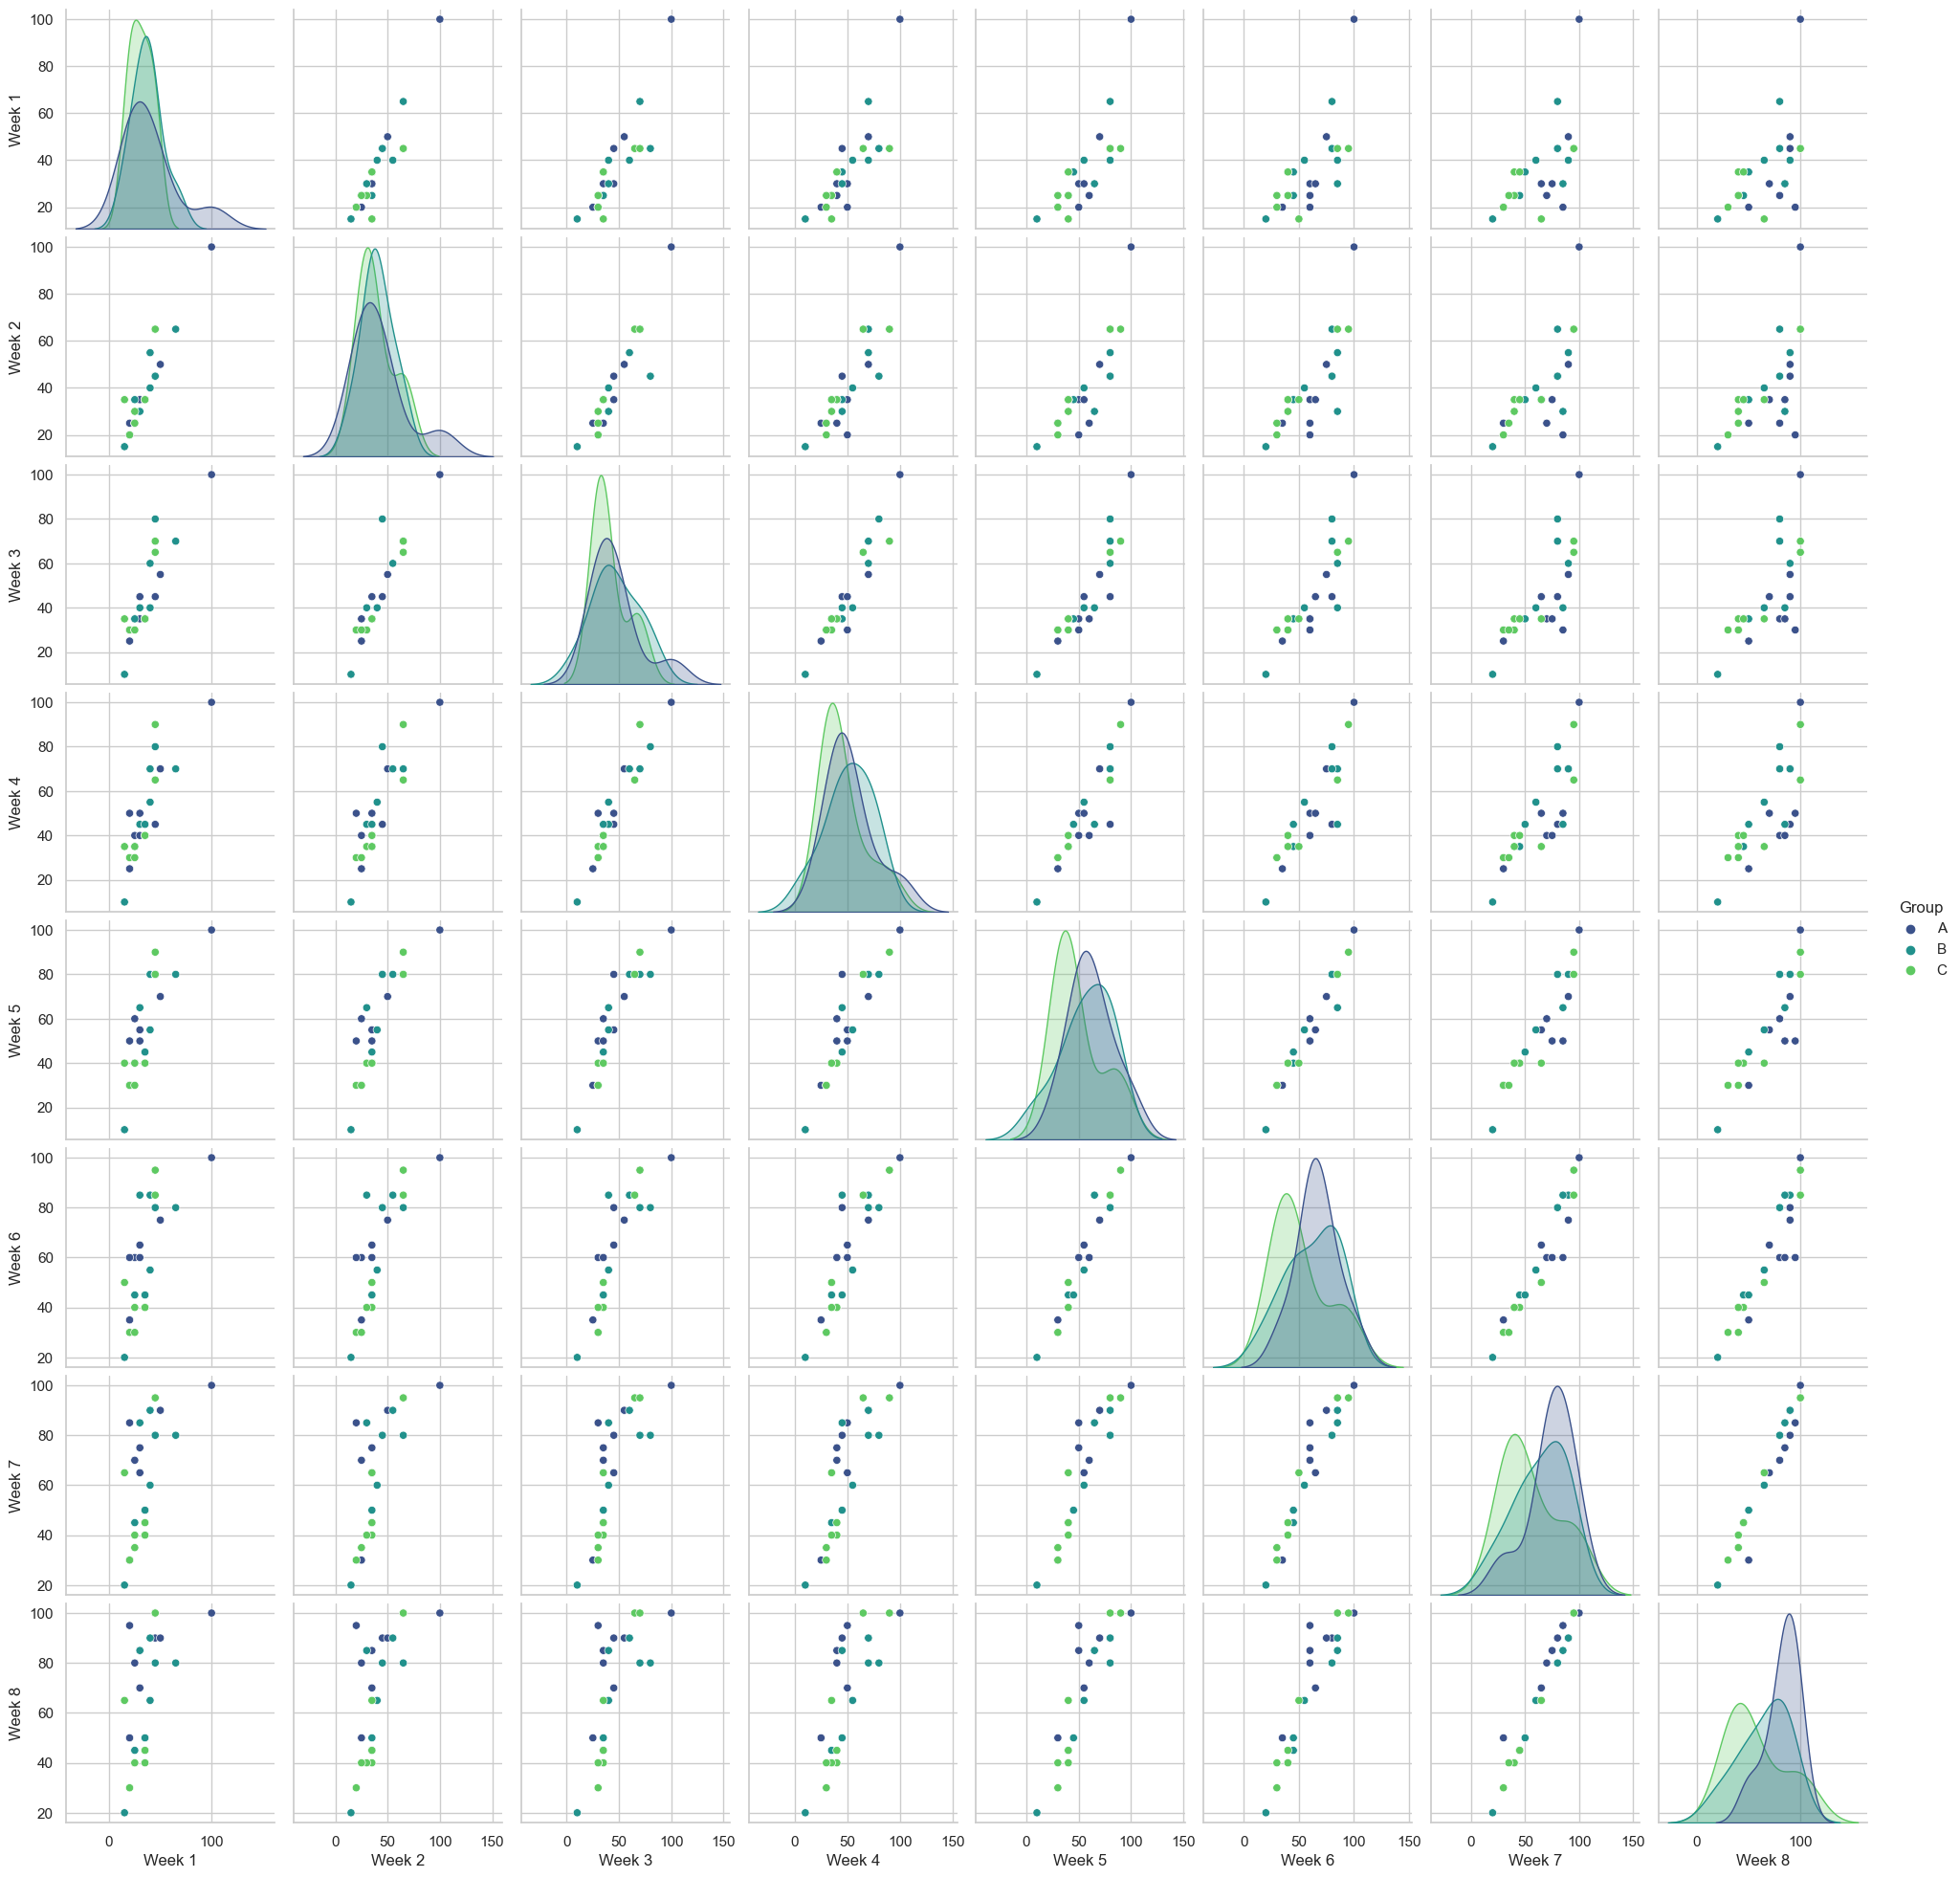

In [16]:
pair_plot = sns.pairplot(df[['Group', 'Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8']],
                         hue='Group', 
                         palette='viridis')

plt.show()

Cambia el formato de la tabla para que sea más fácil su análisis con los diferentes modelos.

In [17]:
df_long = pd.melt(df, id_vars=['Subject', 'Group'], value_vars=['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5', 'Week 6', 'Week 7', 'Week 8'],
                  var_name='Week', value_name='Score')
print(df_long.head())

   Subject Group    Week  Score
0        1     A  Week 1     45
1        2     A  Week 1     20
2        3     A  Week 1     50
3        4     A  Week 1     25
4        5     A  Week 1    100


Realiza un análisis Naive según los modelos vistos en clase:
   - Modelo 1: Considera la misma pendiente para todos los grupos.
   - Modelo 2: Considera diferentes pendientes para cada grupo.

In [18]:
# Modelo 1
df_long['Week_number'] = df_long['Week'].str.extract('(\d+)').astype(int)  
model_1 = smf.ols('Score ~ C(Group) + Week_number', data=df_long).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     20.82
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.08e-11
Time:                        22:09:35   Log-Likelihood:                -855.09
No. Observations:                 192   AIC:                             1718.
Df Residuals:                     188   BIC:                             1731.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        36.8415      3.971      9.277

In [19]:
# Modelo 2
model_2 = smf.ols('Score ~ C(Group)*Week_number', data=df_long).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     13.15
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           5.70e-11
Time:                        22:09:39   Log-Likelihood:                -853.56
No. Observations:                 192   AIC:                             1719.
Df Residuals:                     186   BIC:                             1739.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Ajusta un modelo lineal para cada individuo, y obten:
- Intercepto (Error estándar)
- Pendiente (Error estándar)

In [21]:
df_long['Week_number'] = df_long['Week'].str.extract('(\d+)').astype(int)
results = []
for subject in df_long['Subject'].unique():
    sub_data = df_long[df_long['Subject'] == subject]
    X = sm.add_constant(sub_data['Week_number'])  
    y = sub_data['Score']
    model = sm.OLS(y, X).fit()
    results.append({
        'Subject': subject,
        'Intercept (std. error)': f"{model.params['const']:.3f} ({model.bse['const']:.3f})",
        'Slope (std. error)': f"{model.params['Week_number']:.3f} ({model.bse['Week_number']:.3f})"
    })
results_df = pd.DataFrame(results)
print(results_df)

    Subject Intercept (std. error) Slope (std. error)
0         1         30.000 (7.289)      7.500 (1.443)
1         2         15.536 (4.099)      3.214 (0.812)
2         3         39.821 (3.209)      6.429 (0.636)
3         4         11.607 (3.387)      8.393 (0.671)
4         5        100.000 (0.000)      0.000 (0.000)
5         6          0.893 (5.304)     11.190 (1.050)
6         7         15.357 (4.669)      7.976 (0.925)
7         8         25.357 (1.971)      5.893 (0.390)
8         9         38.571 (3.522)      7.262 (0.698)
9        10         61.964 (2.236)      2.619 (0.443)
10       11         14.464 (5.893)      9.702 (1.167)
11       12         26.071 (2.147)      2.679 (0.425)
12       13         48.750 (8.927)      5.000 (1.768)
13       14         10.179 (3.209)      1.071 (0.636)
14       15         31.250 (1.948)      2.500 (0.386)
15       16         34.107 (2.809)      3.810 (0.556)
16       17         21.071 (2.551)      1.429 (0.505)
17       18         34.107 (

Realiza un ANOVA a los interceptos y a las pendientes. Compara los resultados con el análisis **Naive**.

In [28]:
#Intercept ANOVA
group_info = df_long[['Subject', 'Group']].drop_duplicates()
results_df = pd.merge(results_df, group_info, on='Subject', how='left')
def extract_numeric(value):
    return float(re.match(r"([-+]?\d*\.\d+|\d+)", value).group(0))
results_df['Intercept'] = results_df['Intercept (std. error)'].apply(extract_numeric)
results_df['Slope'] = results_df['Slope (std. error)'].apply(extract_numeric)
model_intercept = ols('Intercept ~ C(Group)', data=results_df).fit()
anova_results_intercept = sm.stats.anova_lm(model_intercept, typ=2) 
model_slope = ols('Slope ~ C(Group)', data=results_df).fit()
anova_results_slope = sm.stats.anova_lm(model_slope, typ=2)
print("ANOVA para Interceptos:\n", anova_results_intercept)
print("\nANOVA para Pendientes:\n", anova_results_slope)


ANOVA para Interceptos:
                sum_sq    df         F    PR(>F)
C(Group)    60.190827   2.0  0.065612  0.936686
Residual  9632.479989  21.0       NaN       NaN

ANOVA para Pendientes:
               sum_sq    df        F    PR(>F)
C(Group)   31.116404   2.0  1.66599  0.213029
Residual  196.113010  21.0      NaN       NaN


In [29]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     54.18
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           0.000322
Time:                        22:34:07   Log-Likelihood:                -24.215
No. Observations:                   8   AIC:                             52.43
Df Residuals:                       6   BIC:                             52.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0357      4.492      2.902      

c:\Users\luisl\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [30]:
# Slope ANOVA
model = ols('Slope ~ C(Group)', data=results_df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)  
print(anova_results)

              sum_sq    df        F    PR(>F)
C(Group)   31.116404   2.0  1.66599  0.213029
Residual  196.113010  21.0      NaN       NaN


In [31]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Slope   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.666
Date:                Tue, 04 Jun 2024   Prob (F-statistic):              0.213
Time:                        22:35:53   Log-Likelihood:                -59.262
No. Observations:                  24   AIC:                             124.5
Df Residuals:                      21   BIC:                             128.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.3244      1.080      5.854

Prueba diferentes modelos

In [32]:
model_pooled = ols('Score ~ C(Group) + Week_number', data=df_long).fit()
model_gee_independent = GEE.from_formula('Score ~ C(Group) + Week_number', groups=df_long['Subject'],
                                         cov_struct=Independence(), data=df_long).fit()

model_gee_equi = GEE.from_formula('Score ~ C(Group) + Week_number', groups=df_long['Subject'],
                                  cov_struct=Exchangeable(), data=df_long).fit()

model_random_effects = MixedLM.from_formula('Score ~ C(Group) + Week_number', groups=df_long['Subject'], data=df_long).fit()
print("Resumen del Modelo Pooled:\n", model_pooled.summary())
print("\nResumen del Modelo GEE, Independiente:\n", model_gee_independent.summary())
print("\nResumen del Modelo GEE, Equicorrelacionado:\n", model_gee_equi.summary())
print("\nResumen del Modelo de Efectos Aleatorios:\n", model_random_effects.summary())

Resumen del Modelo Pooled:
                             OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     20.82
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           1.08e-11
Time:                        22:40:09   Log-Likelihood:                -855.09
No. Observations:                 192   AIC:                             1718.
Df Residuals:                     188   BIC:                             1731.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        3

Compara los modelos entre sí.

In [33]:
model_pooled = ols('Score ~ C(Group) + Week_number', data=df_long).fit()
model_gee_independent = GEE.from_formula('Score ~ C(Group) + Week_number', groups=df_long['Subject'],
                                         cov_struct=Independence(), data=df_long).fit()
model_gee_equi = GEE.from_formula('Score ~ C(Group) + Week_number', groups=df_long['Subject'],
                                  cov_struct=Exchangeable(), data=df_long).fit()
model_random_effects = MixedLM.from_formula('Score ~ C(Group) + Week_number', groups=df_long['Subject'], data=df_long).fit()
def extract_params(model):
    params = model.params
    bse = model.bse
    return pd.Series({
        'α1': f"{params['Intercept']:.3f} ({bse['Intercept']:.3f})",
        'β1': f"{params['Week_number']:.3f} ({bse['Week_number']:.3f})"
    })

comparison_df = pd.DataFrame({
    'Model': ['Pooled', 'Data reduction', 'GEE, independent', 'GEE, equicorrelated', 'Random effects'],
    'α1': [extract_params(m)['α1'] for m in [model_pooled, model_pooled, model_gee_independent, model_gee_equi, model_random_effects]],  
    'β1': [extract_params(m)['β1'] for m in [model_pooled, model_pooled, model_gee_independent, model_gee_equi, model_random_effects]]
})
print(comparison_df)

                 Model              α1             β1
0               Pooled  36.842 (3.971)  4.764 (0.662)
1       Data reduction  36.842 (3.971)  4.764 (0.662)
2     GEE, independent  36.842 (8.004)  4.764 (0.628)
3  GEE, equicorrelated  36.842 (8.004)  4.764 (0.628)
4       Random effects  36.842 (7.308)  4.764 (0.282)


**Conclusión**

Por lo que puedo observar mis resultados demuestran la importancia de considerar tanto la consistencia de las estimaciones de los coeficientes como las diferencias en los errores estándar al evaluar los resultados de varios modelos estadísticos. La selección del modelo puede ser crucial dependiendo de las características específicas de los datos y los requisitos analíticos, los errores estándar para el intercepto varían significativamente, el más alto es el modelo GEE equicorrelacionado y más bajo en el modelo de reducción de datos. Esto puede reflejar diferencias en cómo cada modelo gestiona la estructura de correlación y heterogeneidad en los datos, mi elección es el de efectos aleatorios por los errores estándar más bajos y la capacidad del modelo para manejar la variabilidad intragrupo.